In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pepsi-and-cocacola-images/test/pepsi/20.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/6.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/5.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/8.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/10.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/0.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/9.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/1.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/29.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/16.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/23.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/7.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/28.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/22.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/24.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/13.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/17.jpg
/kaggle/input/pepsi-a

In [2]:
import cv2
import matplotlib.pyplot as plt
import pathlib, os, random
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation
import matplotlib.pyplot as plt
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)
batch_size = 32
img_height, img_width = 200, 200
input_shape = (img_height, img_height, 3)

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '../input/pepsi-and-cocacola-images/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  '../input/pepsi-and-cocacola-images/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 340 files belonging to 2 classes.
Using 272 files for training.


2022-08-18 20:14:01.821184: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 60 files belonging to 2 classes.
Using 12 files for validation.


2022-08-18 20:14:02.111850: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


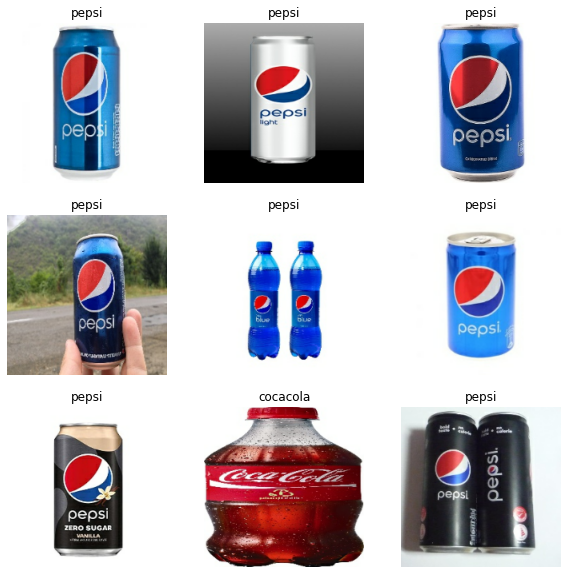

In [5]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [7]:
model = Sequential([
  data_augmentation,  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  
  layers.Flatten(),
  layers.Dense(128, activation='relu6'),
  layers.Dense(128, activation='relu6'),
  layers.Dense(64, activation='sigmoid'),
  layers.Dense(64, activation='tanh'),  
  layers.Dense(len(class_names))
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)       

In [10]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/15
9/9 [==============================] - 5s 377ms/step - loss: 0.6807 - accuracy: 0.5294 - val_loss: 0.6212 - val_accuracy: 0.5833
Epoch 2/15
9/9 [==============================] - 3s 346ms/step - loss: 0.5476 - accuracy: 0.7279 - val_loss: 0.3216 - val_accuracy: 0.8333
Epoch 3/15
9/9 [==============================] - 3s 341ms/step - loss: 0.3464 - accuracy: 0.8603 - val_loss: 0.1459 - val_accuracy: 0.9167
Epoch 4/15
9/9 [==============================] - 3s 353ms/step - loss: 0.2021 - accuracy: 0.9191 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 5/15
9/9 [==============================] - 3s 345ms/step - loss: 0.1150 - accuracy: 0.9522 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 6/15
9/9 [==============================] - 3s 345ms/step - loss: 0.0886 - accuracy: 0.9669 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7/15
9/9 [==============================] - 4s 417ms/step - loss: 0.0649 - accuracy: 0.9743 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 8/15
9/9 [====

In [11]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 59ms/step - loss: 0.0076 - accuracy: 1.0000


[0.007557092700153589, 1.0]

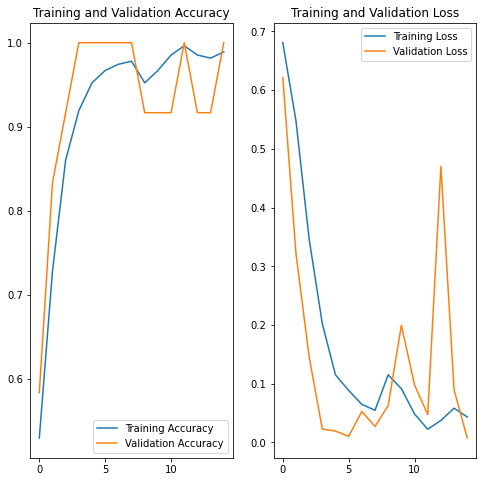

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [13]:
soda_url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fpics.me.me%2F%25C2%25BFa-qui%25C3%25A9n-conoces-que-se-tomar%25C3%25ADa-toda-esta-coca-cola-sin-57275529.png&f=1&nofb=1"
soda_path = tf.keras.utils.get_file('soda', origin=soda_url)

img = tf.keras.utils.load_img(
    soda_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

  98304/Unknown - 0s 4us/stepThis image most likely belongs to cocacola with a 99.78 percent confidence.
